# PROJECT : 7 - The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
train_df = pd.read_csv(r'Big Data Mart Sales Problem')

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# data types of attributes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# check unique values in dataset
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
# checking for null values
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# checking categorical attributes
cat_col = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [10]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(train_df[col].value_counts())
    print

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [12]:
# fill the missing values
item_weight_mean = train_df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
# fill the missing values
item_weight_mean = train_df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
miss_bool = train_df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
for i, item in enumerate(train_df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            train_df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            train_df['Item_Weight'][i] = np.mean(train_df['Item_Weight'])

In [16]:
train_df['Item_Weight'].isnull().sum()

0

In [17]:
outlet_size_mode = train_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool = train_df['Outlet_Size'].isnull()
train_df.loc[miss_bool, 'Outlet_Size']= train_df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x]) 

In [19]:
train_df['Outlet_Size'].isnull().sum()

0

In [20]:
sum(train_df['Item_Visibility']==0)

526

In [21]:
train_df.loc[:, 'Item_Visibility'].replace([0],[train_df['Item_Visibility'].mean()], inplace=True) 

In [22]:
sum(train_df['Item_Visibility']==0)

0

In [23]:
# combine item fat content
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat': 'Low Fat'})
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
train_df['Item_Type'] = train_df['Item_Identifier'].apply(lambda X: X[:2])
train_df['Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type, Length: 8523, dtype: object

In [25]:
train_df['Item_Type'] = train_df['Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable','DR':'Drinks'})
train_df['Item_Type'].value_counts() 

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64

In [26]:
train_df.loc[train_df['Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
train_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [27]:
# create small values for year establishment year
train_df['Outlet_Years'] = 2013 - train_df['Outlet_Establishment_Year']

In [28]:
train_df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [29]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.066132,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Non-Edible,0.066132,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

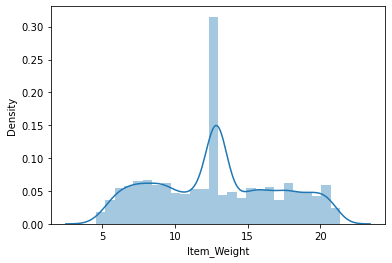

In [30]:
sns.distplot(train_df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

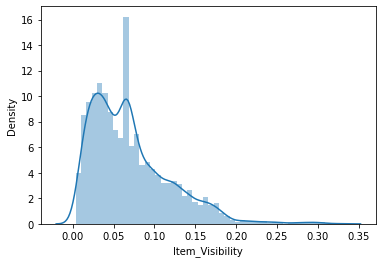

In [31]:
sns.distplot(train_df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

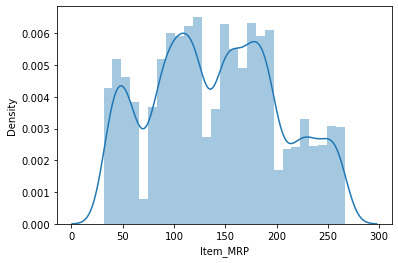

In [32]:
sns.distplot(train_df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

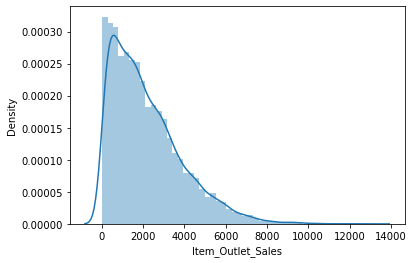

In [33]:
sns.distplot(train_df['Item_Outlet_Sales'])

In [34]:
# uisnf log Transformation
train_df['Item_Outlet_Sales'] = np.log(1+train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

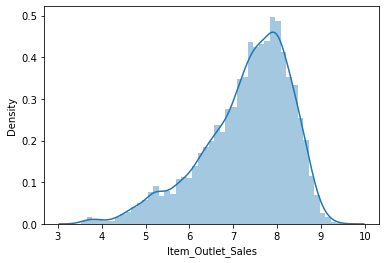

In [35]:
sns.distplot(train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

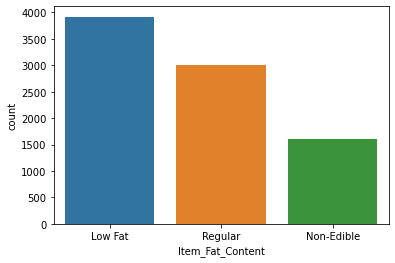

In [36]:
sns.countplot(train_df["Item_Fat_Content"])

[Text(0, 0, 'Food'), Text(1, 0, 'Drinks'), Text(2, 0, 'Non-Consumable')]

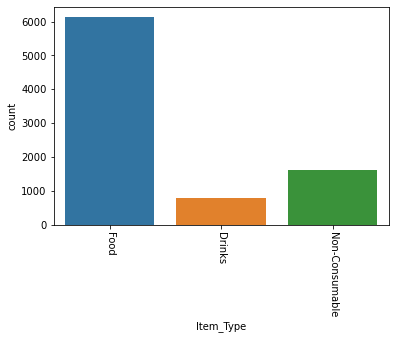

In [37]:
# plt.figure(figsize=(25,10))
l = list(train_df['Item_Type'].unique())
chart = sns.countplot(train_df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=270)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

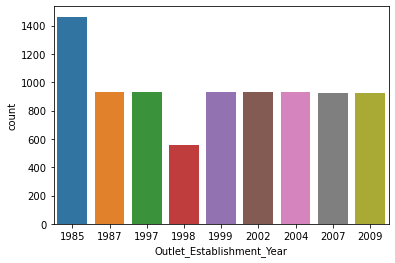

In [41]:
sns.countplot(train_df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

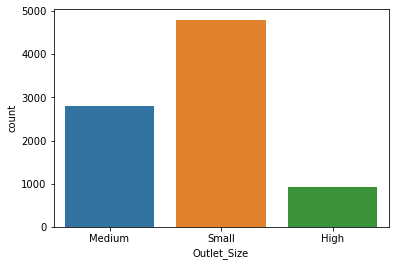

In [40]:
sns.countplot(train_df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

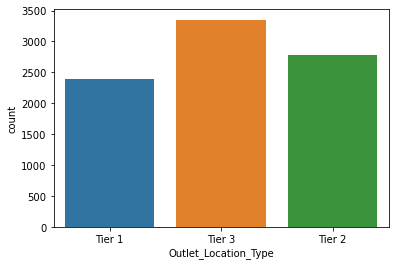

In [42]:
sns.countplot(train_df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

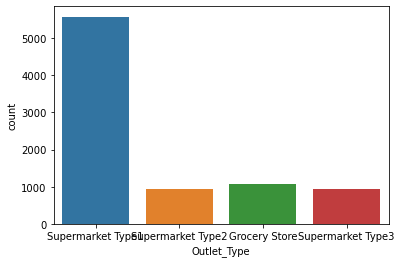

In [43]:
sns.countplot(train_df['Outlet_Type'])

# COORELATION MATRIX

<AxesSubplot:>

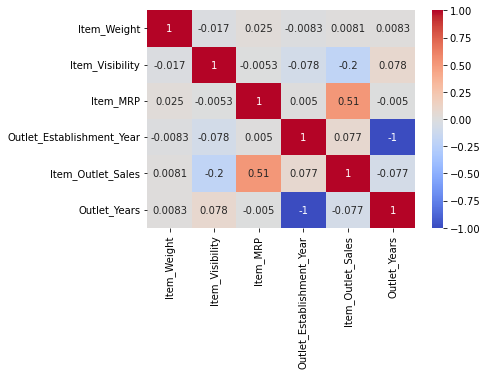

In [45]:
# corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# LABEL ENCODING

In [46]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,14
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,4
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,14
3,FDX07,19.20,Regular,0.066132,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,15
4,NCD19,8.93,Non-Edible,0.066132,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,26


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Outlet'] = le.fit_transform(train_df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
for col in cat_col:
    train_df[col] = le.fit_transform(train_df[col])
    

# ONEHOT ENCODING

In [49]:
trian_df = pd.get_dummies(train_df, columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size'])
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,8.225808,14,9
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,6.096776,4,3
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,7.648868,14,9
3,FDX07,19.20,2,0.066132,1,182.0950,OUT010,1998,2,2,0,6.597664,15,0
4,NCD19,8.93,1,0.066132,2,53.8614,OUT013,1987,0,2,1,6.903451,26,1


In [50]:
X = train_df.drop(columns=['Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales','Item_Identifier'])
y = train_df['Item_Outlet_Sales']

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    
    # train the model
    
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring= 'neg_mean_absolute_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.4327753682890805
CV Score: 0.5237586836417086


<AxesSubplot:title={'center':'Model Coefficients'}>

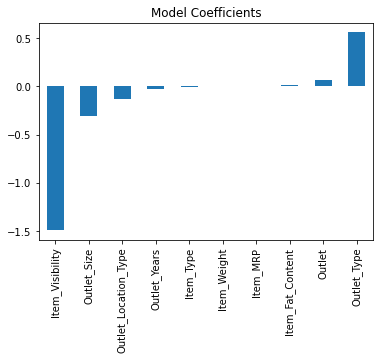

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.5729792249447696
CV Score: 0.5996711123073161


<AxesSubplot:title={'center':'Model Coefficients'}>

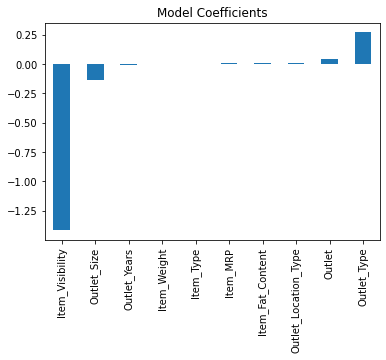

In [53]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.6638429382952757


<AxesSubplot:title={'center':'Model Coefficients'}>

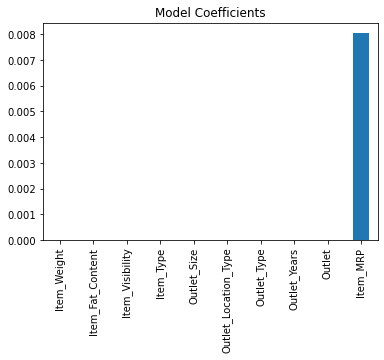

In [55]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance"

SyntaxError: unexpected EOF while parsing (2914194992.py, line 5)